In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape
# shows the size of our data set 

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

# here we dropped the uneccessary values

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

# here we start the data cleaning process

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
# here we dropped all the na values from the data set 
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df3.shape

(13246, 5)

In [9]:
df3.isnull().sum()
# here we again checked if any of the value is null still exists

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3['size'].unique()

# now we find the each of the unique values preasent in the size chategory

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['BHK'] =df3['size'].apply(lambda x: int (x.split(' ')[0]))

# here we separated int value from size parameter which had no of bedrooms 
# using the labda function of python 

C:\Users\HP\AppData\Local\Temp/ipykernel_11040/2892859921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] =df3['size'].apply(lambda x: int (x.split(' ')[0]))


In [12]:
df3


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [13]:
df3.drop(['size'],axis = 'columns')


,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [14]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
df3.shape

(13246, 6)

In [17]:
# now we will declare a function to find the wrong values in the total square foot para meter 

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [20]:
# convert_sqft_to_num('34.46Sq. Meter')

df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
# df4 = df4[df4.total_sqft.notnull()]
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df5 = df4.copy()

In [22]:
df5


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [23]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5['location'].unique())


# so now when we are going to explore the location col we have we found that a large no of locations 
# usually we use one hot encoding to convert text data to numeric form 
# but here we use one hot encoding then we will have 1304 cols added to our dataset
# such type of problem is called dimensionality curse or high dimensionality problem 

1304

In [25]:
df5.location = df5.location .apply(lambda x: x.strip())
# location_stat is the variable that is declared first 
# then we used the groupby function to group each of the unique location from the dataset
# then we wanted a col that had aggregate each one to get the count

# overall we found all the data points of each location 
location_stat = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stat[location_stat<=10])

1052

In [27]:
# here we classified the locations with less than 10 data points 
# which will be classified as other locations 

location_stats_less_than_ten = location_stat[location_stat<=10]


location_stats_less_than_ten

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [28]:
len(df5.location.unique())

1293

In [29]:
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_ten else x)
len(df5.location.unique())

242

In [30]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [31]:
# outliner detection 

In [32]:
df5[df5.total_sqft/df5.BHK<100]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3.333333e+04
349,other,3 Bedroom,11.0,3.0,74.0,3,6.727273e+05
770,other,9 Bedroom,600.0,9.0,190.0,9,3.166667e+04
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,1.200000e+04
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,2.857143e+04
1020,other,1 BHK,15.0,1.0,30.0,1,2.000000e+05
1103,5th Phase JP Nagar,9 Bedroom,812.0,6.0,165.0,9,2.032020e+04
1122,other,5 Bedroom,24.0,2.0,150.0,5,6.250000e+05
1490,Malleshwaram,9 Bedroom,750.0,8.0,150.0,9,2.000000e+04
1567,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5,5.000000e+04


In [33]:
len(df5[df5.total_sqft/df5.BHK<100])

40

In [34]:
df6 = df5[~(df5.total_sqft/df5.BHK<100)]
df6.head(40)
df6.shape


(13206, 7)

In [35]:
df6

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [36]:
df6.price_per_sqft.describe()

# describe function give basic info about the col we specify like mean median etc

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

In [37]:
# HANDELLING THE OUTLIERS IN THE DATA FRAME 

# we declare a function 
# input = dataframe



def remove_pps_outliers(df):
    df_out = pd.DataFrame()
#     here we will group them by location 
    for key, subdf in df.groupby('location'):
#         for each location we get this subdataframe as SUBDF
        m = np.mean(subdf.price_per_sqft)
#     we now found the mean for each subdata frame 
        st = np.std(subdf.price_per_sqft)
#     we now found the standard deviation for each dubdatframe 
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
#     we declared a reduced data frame for keeping the vales which lays btw mean-standard deviation and mean+standard deviation
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     we now will keep on appending each result that we get from each location 
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape  

(10927, 7)

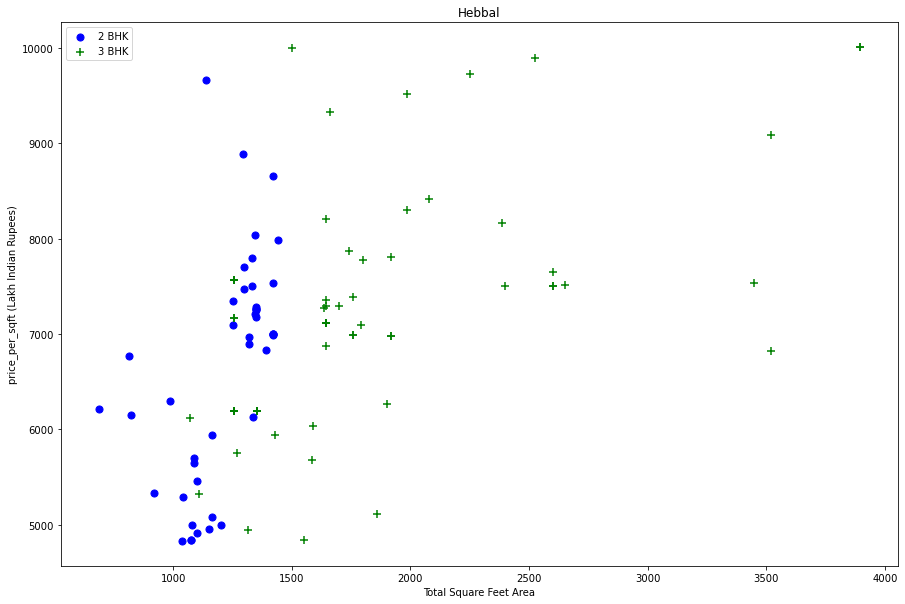

In [38]:

# we define a function to plot a graph btw total sq feet area and price 
def plot_scatter_chart(df,location):
#     this function takes input as a data frame and a location of which we have to do the analysis 
    bhk2 = df[(df.location==location) & (df.BHK==2)]
#     we declare a variable where we store the data points where we have 2 bhk flat size 
    bhk3 = df[(df.location==location) & (df.BHK==3)]
#     just as 2 bhk we also declare a variable to store the data points of 3 bhk
    matplotlib.rcParams['figure.figsize'] = (15,10)
#     now we will plot the graph between them 
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
#     we will first write a schatter plot command for 2 bhk 
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label='3 BHK', s=50)
#     we will now write the schatter plot command for 3 bhk as well 
    plt.xlabel("Total Square Feet Area")
#     we declared the x label 
    plt.ylabel("price_per_sqft (Lakh Indian Rupees)")
#      we declared the x label
    plt.title(location)
    plt.legend()
#     we now call the above plot for the dataframe 7 and for the location rajaji nagar 
plot_scatter_chart(df7,"Hebbal")


In [39]:
# by looking at the csv file we find that there are few errors in the data that in one are we find hat a 2 bhk house has more 
# than the a 3 bhk house and we find the reason we plot a schatter plot above 


In [40]:
# now from the above graph we find that the there are few data points where we have 2 bhk price more than three bhk price for 
# the same location 

In [41]:
# now we will create a function where we have a dictionary where we will have a dictionary where we will have a mean of the say
# 2 bhk apartment and also the standard deviation and count 
# we will check each of the 3 bhk apartment and try to find the ones where cost of it is more than the mean of the 2 bhk 
# 

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
#     declare a array 
    for location, location_df in df.groupby('location'):
# iterating through each location in the groupby location function i.e we first divide location into differnt subgroups 
# and are iterating through each location of  the subgroup
        bhk_stats = {}
#     we defined a dictionary named bhk_stats 
        for bhk, bhk_df in location_df.groupby('BHK'):
#         we will iterate in each location for bhk values in each locations data points 
            bhk_stats[bhk] = {
#                 we are filling the dictionary with the mean, standard deviation and count  value for each bhk
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
 
        for bhk, bhk_df in location_df.groupby('BHK'):
#         we will iterate in each location for bhk - 1  values in each locations data points 
# we will compare it with the bhk vale and check the ans with bhk-1 value 
            stats = bhk_stats.get(bhk-1)
#     using if condition we will try to filter all the data points where the price per sq ft is less than the bhk value 
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

df8.shape

(7815, 7)

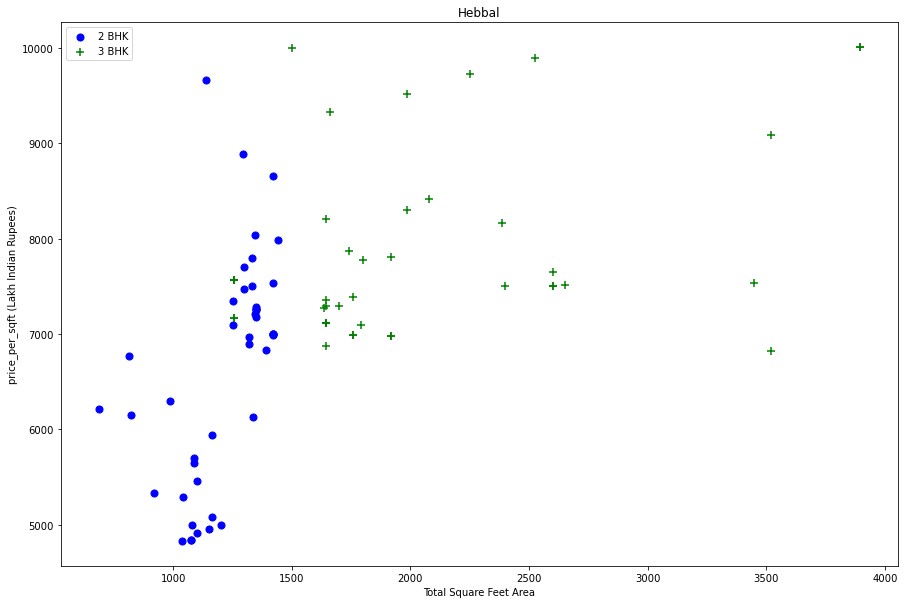

In [43]:
plot_scatter_chart(df8,"Hebbal")

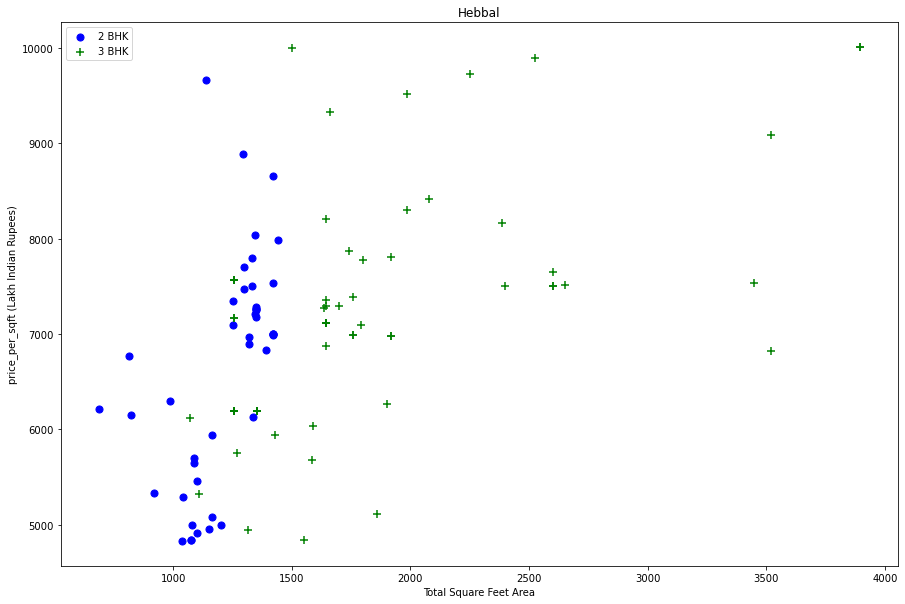

In [44]:
plot_scatter_chart(df7,"Hebbal")

In [45]:
df7.shape

(10927, 7)

In [46]:
df8.shape

(7815, 7)

Text(0, 0.5, 'Count')

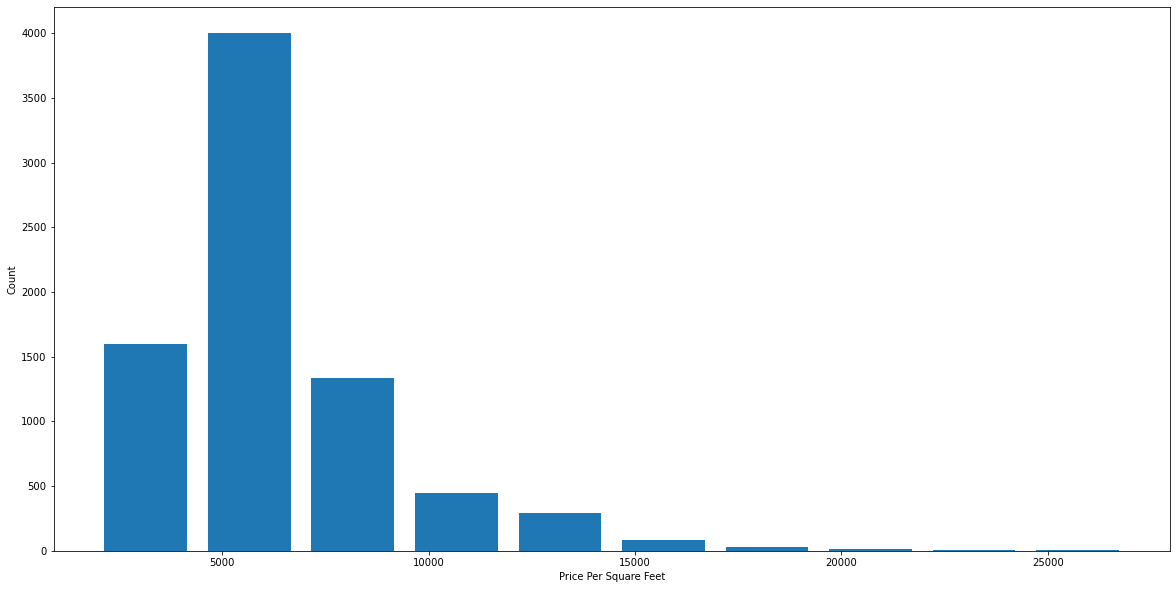

In [47]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [48]:

# we will now check the feature of the bathrooms 

df8.bath.unique()




array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 27., 11.,
       16., 13.])

In [49]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5640,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8748,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
8753,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
8801,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9102,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9907,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10269,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [50]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1634,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1770,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5599,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7139,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8801,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
10283,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


In [51]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7729, 7)

In [52]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


In [53]:
# using one hot encoder to get the dummy varia bles for the text data that we have 

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# we will now concartinate both the data frames one we had before and the dummy variables that we have now 

In [55]:


df11 = pd.concat([df10,dummies.drop('other',axis = 'columns')],axis = 'columns')
# we droped the columns from the dumies variable because to escape the dummy variable trap where we have a extra column so we
# when we have all other values as zero it will mean we mean to say that it is the col that we drped 
df11.head(11)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12  = df11.drop('location',axis = 'columns')
df12.head(10)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:

# we now separate dependant and independant variables 
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:

# now we have the dependant variable 
y = df12.price
y.head(10)

0     428.0
1     194.0
2     125.0
3     235.0
4      85.0
5     130.0
6     148.0
7     413.0
8     368.0
10    167.0
Name: price, dtype: float64

In [59]:
# we now import the test rain split and 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
# we will use linear regression model 

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8253708392207973

In [61]:
# we will now use k flod validation 
# we will also use sufflesplit to ensure that one kind of data donot fall into one fold
# it will randomize the sample

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78390782, 0.80213844, 0.83669946, 0.79994602, 0.84617623])

In [62]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.813774,{'normalize': False}
1,lasso,0.669035,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.719259,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [63]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [64]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.43360510077925

In [65]:
# we exported our model to a pricle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [66]:
# we now will export the jason file cointaining the list of all the columns 

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))